In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
january = pd.read_csv("Sales_January_2019.csv")
february = pd.read_csv("Sales_February_2019.csv")
march = pd.read_csv("Sales_March_2019.csv")

In [6]:
q1 = pd.concat([january,february,march],axis=0)

<AxesSubplot:>

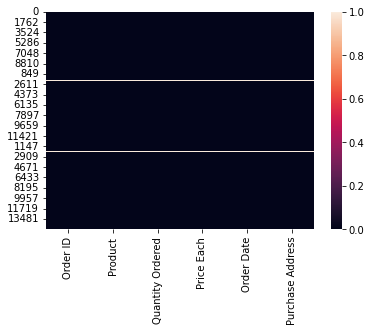

In [7]:
sns.heatmap(data=pd.isnull(q1))

In [15]:
q1 = q1.dropna()

In [9]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36985 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          36890 non-null  object
 1   Product           36890 non-null  object
 2   Quantity Ordered  36890 non-null  object
 3   Price Each        36890 non-null  object
 4   Order Date        36890 non-null  object
 5   Purchase Address  36890 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [16]:
q1['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6'], dtype=object)

In [13]:
filter = q1['Quantity Ordered'] != 'Quantity Ordered'
q1 = q1[filter]

In [17]:
q1['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6'], dtype=object)

In [18]:
q1['month'] = q1['Order Date'].str[0:2]
q1['year'] = q1['Order Date'].str[6:8]
q1['time'] = q1['Order Date'].str[-6:-3]
q1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,19,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,19,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,19,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,19,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,19,11
...,...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03,19,11
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03,19,20
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03,19,10
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03,19,12


In [21]:
q1['Quantity Ordered'] = pd.to_numeric(q1['Quantity Ordered'])
q1['Price Each'] = pd.to_numeric(q1['Price Each'])
q1['month'] = pd.to_numeric(q1['month'])
q1['year'] = pd.to_numeric(q1['year'])
q1['time'] = pd.to_numeric(q1['time'])
q1['Order Date'] = pd.to_datetime(q1['Order Date'])

In [22]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36821 entries, 0 to 15225
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          36821 non-null  object        
 1   Product           36821 non-null  object        
 2   Quantity Ordered  36821 non-null  int64         
 3   Price Each        36821 non-null  float64       
 4   Order Date        36821 non-null  datetime64[ns]
 5   Purchase Address  36821 non-null  object        
 6   month             36821 non-null  int64         
 7   year              36821 non-null  int64         
 8   time              36821 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 2.8+ MB


Products sold over time